In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

In [8]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'SWISS_2023_f_emSX'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
                if os.path.isdir(os.path.join(data_directory, name))]
subjects.remove('SW42Female')

In [9]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [10]:
def load_subject(subject):
    df_mouse = pd.read_csv(data_directory + subject + '/cells700.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

In [12]:
#NB: Run only if file does not exist or needs to be regenerated
# dict_results_across_mice = {}
# for subject in subjects:
#     print(subject)
#     dict_results_across_mice[subject] = ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
#                                                                           vol=volumes, 
#                                                                           level=8)
# np.save('dict_results/dict_results_across_mice_SWISS_2023_f_emSX-700.npy', dict_results_across_mice)

In [13]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_SWISS_2023_f_emSX-700.npy', allow_pickle=True).item()

In [14]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)


In [35]:
experimental_groups

{'Control': ['SW47Control',
  'SW25Control',
  'SW45Control',
  'SW40Control',
  'SW32Control'],
 'Unfam': ['SW28Unfam',
  'SW38Unfam',
  'SW48Unfam',
  'SW41Unfam',
  'SW27Unfam',
  'SW31Unfam'],
 'Fam': ['SW35Fam', 'SW43Fam', 'SW26Fam', 'SW49Fam', 'SW46Fam', 'SW30Fam']}

In [36]:
dict_results_across_mice['SW28Unfam']

,area,n_cells,energy
0,Frontal pole cerebral cortex,76,5.369609e+05
1,Primary motor area,2673,1.831847e+06
2,Secondary motor area,1765,1.047266e+06
3,Primary somatosensory area,3572,1.154829e+06
4,Supplemental somatosensory area,1330,1.155057e+06
...,...,...,...
293,Flocculus,139,7.981633e+05
294,Fastigial nucleus,379,4.993647e+06
295,Interposed nucleus,1074,8.466740e+06
296,Dentate nucleus,266,5.713068e+06


In [37]:
dict_results_across_mice['SW28Unfam'].to_csv('SW28Unfam')

In [39]:
dict_results_across_mice['SW30Fam'].to_csv('SW30Fam.csv')

# Calculate number of cells

In [15]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [16]:
df_ttest_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.484033,0.222794,0.769951
1,Primary motor area,0.188383,0.171341,0.959736
2,Secondary motor area,0.236831,0.205617,0.883809
3,Primary somatosensory area,0.220532,0.200561,0.981501
4,Supplemental somatosensory area,0.183691,0.224404,0.631943
...,...,...,...,...
293,Flocculus,0.474437,0.628328,0.749473
294,Fastigial nucleus,0.108536,0.378504,0.149244
295,Interposed nucleus,0.251727,0.666252,0.280509
296,Dentate nucleus,0.880017,0.869024,0.765159


In [17]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [18]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,0.0842672
Linear nucleus of the medulla,0.0994884
Fastigial nucleus,0.108536
Nucleus raphe magnus,0.120564
Paragigantocellular reticular nucleus,0.128026
Intermediate reticular nucleus,0.14817
Superior olivary complex,0.160841
Nucleus ambiguus,0.168102
Posterior complex of the thalamus,0.168744


In [19]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral premammillary nucleus,0.0156763
Interanteromedial nucleus of the thalamus,0.0378087
Rhomboid nucleus,0.0452787
Central medial nucleus of the thalamus,0.0635704
Intermediodorsal nucleus of the thalamus,0.0678012
Paraventricular nucleus of the thalamus,0.0724616
Septohippocampal nucleus,0.0878641
Visceral area,0.0913066
Median preoptic nucleus,0.0920496


In [20]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Superior olivary complex,0.0302295
Subfornical organ,0.113416
Septohippocampal nucleus,0.116213
Paragigantocellular reticular nucleus,0.119167
Linear nucleus of the medulla,0.120401
Induseum griseum,0.123072
Paraventricular nucleus of the thalamus,0.142025
Fastigial nucleus,0.149244
Infracerebellar nucleus,0.160014


# Calculate corr matrices on number of cells

In [21]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

Text(0.5, 1.0, 'CONTROL')

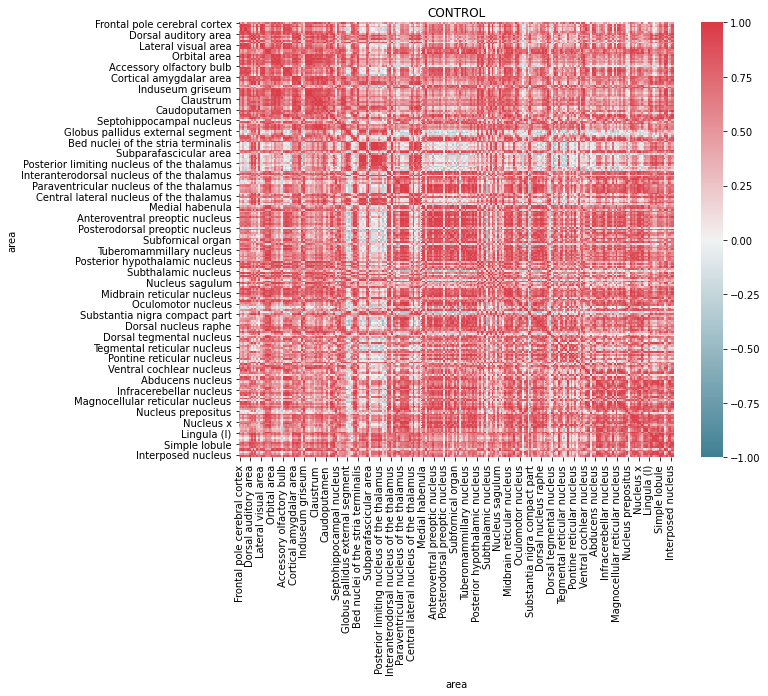

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

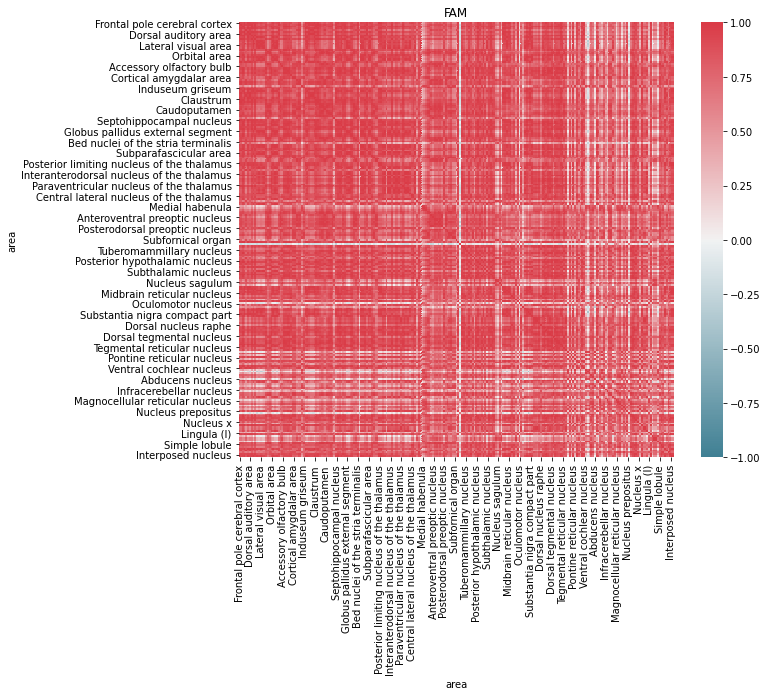

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

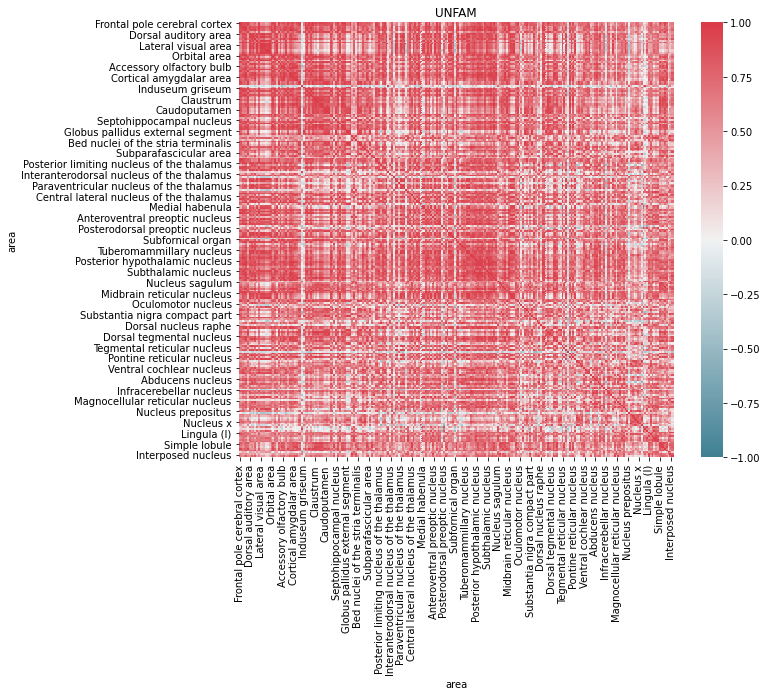

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy

In [25]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

In [26]:
df_ttest_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy)

In [27]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [28]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,0.0726867
Fastigial nucleus,0.0972884
Paragigantocellular reticular nucleus,0.112269
Linear nucleus of the medulla,0.112884
Nucleus raphe magnus,0.120017
Intermediate reticular nucleus,0.147206
Superior olivary complex,0.148769
Postsubiculum,0.153183
Supplemental somatosensory area,0.155247


In [29]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral premammillary nucleus,0.0160645
Interanteromedial nucleus of the thalamus,0.0372128
Rhomboid nucleus,0.0451119
Central medial nucleus of the thalamus,0.0622936
Intermediodorsal nucleus of the thalamus,0.0698591
Subfornical organ,0.0709887
Paraventricular nucleus of the thalamus,0.0734887
Median preoptic nucleus,0.0836115
Visceral area,0.0860181


In [30]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Superior olivary complex,0.0213534
Subfornical organ,0.103058
Septohippocampal nucleus,0.110642
Paragigantocellular reticular nucleus,0.11179
Induseum griseum,0.114699
Fastigial nucleus,0.120314
Magnocellular nucleus,0.143364
Facial motor nucleus,0.145547
Paraventricular nucleus of the thalamus,0.145781


# Calculate corr matrix on energy

In [31]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

Text(0.5, 1.0, 'CONTROL')

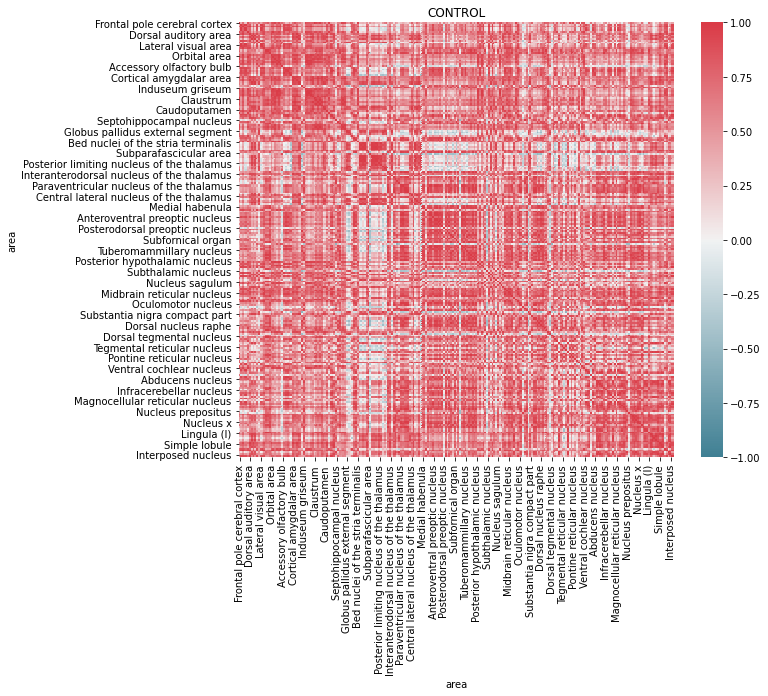

In [32]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

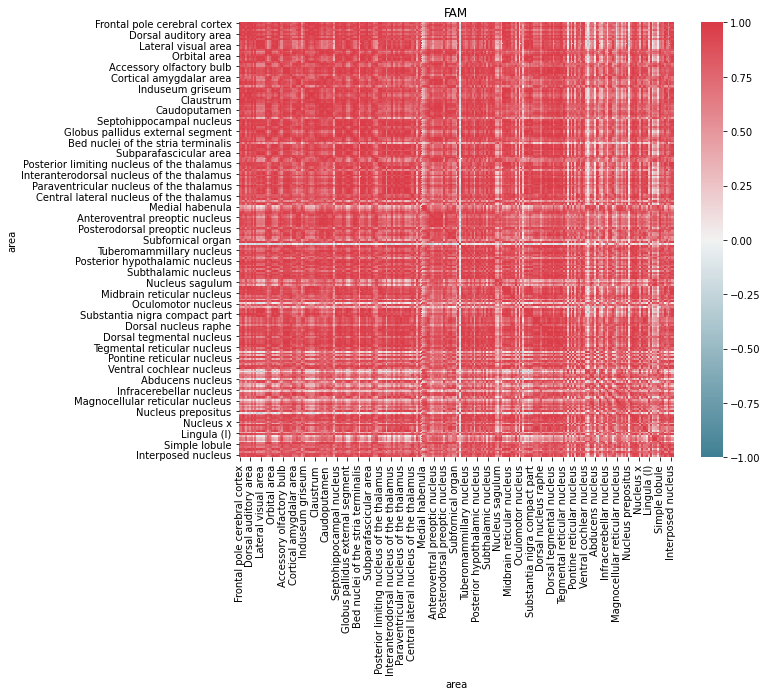

In [33]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

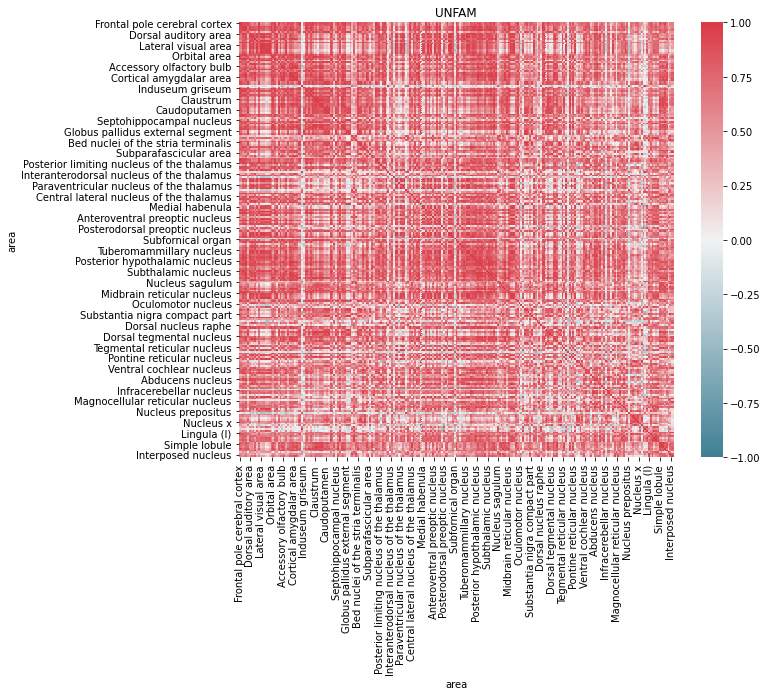

In [34]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')